# Lecture 5: Discrete Markov Models, Hidden Markov Models, Detection Problems

## Last Week Recap

- We were talking about assigning a set of feature vectors to classes (eg. phones, speech vs silence, gender, age, etc...). These feature vectors represent only one frame, and we can use multiple frames to classify emotions, accents and other things.

- $P(C_{k} | x_{m}) = \frac{P(x_{m} | C_{k})\cdot P(C_{k})}{P(X)}$

- $P(X) = \sum_{k=1}^{K}P(X_{m} | C_{k})\cdot P(C_{k})$

- $P(X_{m} | C_{k})$ is best estimated using Gaussians, K-Means, VQ-Discrete DIstributions. Kernel Methods & Parson Window are used too, and theire advantage is the fact that we do not make any assumptions or give any hyperparameters before using the methods/algorithms. These are called generative modelling. We can also use Auto-encoders.

- $P(C_{k} | x_{m})$ is best estimated using ANNs, Random Forest, KNNs, SVM-Platt. These are called discriminative modelling.

- Performance vs Data Quantity: SVM & RF need less data than ANNs to acheive the same performance, since ANNs need a large quantity of data to get a good performance. Gaussians dont start well, but they converge well with the Data Quantity, although a bit slower than ANNs.
- Why? SVM looks at the vector aligning at the boundary of the classes, they do not care about how the data is distributed, same goes for Random Forest. ANNs find a discriminant function, a smooth function that discriminate the classes, why they need more data than SVMs & RF.

## Sequence Classification

We have two sequences of speech & words respectively, $\bf{X}$ = {$x_{1}, x_{2}, ..., x_{m}, ..., x_{M}$} & $\bf{W}$ = {$w_{1}, w_{2}, ..., w_{k}, ..., w_{K}$}. And we want to match the speech signal sequence to the most probable word sequence $\bf{W^{*}_{k}}$ and vice-verse, match the word sequence $\bf{W}$ to the most probable speech signal sequence (being ASR & TTS respectively).

- **Automatic Speech Recognition:**

    $\bf{W^{*}_{k}} = \underset{W_{k}\in\space\mathcal{W}}{\mathrm{argmin}} P(W_{k} | X) = \frac{P(X | W_{k})\cdot P(W_{k})}{P(X)}$. $\mathcal{W}$ being a set of hypotheses, $P(X | W_{k})$ being the likelihood.

    $P(X) = \sum_{k=1}^{K} P(X | W_{k})\cdot P(W_{k})$ (Marginalization) (We HAVE to make two assumptions, being mutually exclusive and collectively exhaustive) (Assuming they are collectively exhaustive means that we have a closed set of sentences, which practically cannot be the case, making the denominator our problem in this equation.)

    To solve this we have to come up with a method to generate sequences $\rightarrow$ among which are Discrete Markov Models, that do not need emissions.

    And to compute the likelihood, we would need another sequence generator, another variant of the Markov Models, which is the Hidden Markov Models.

    + **Discrete Markov Models:**

        - Markov Models are stochastic finite state automatons. It is a sequence machine, finite state machine. This model gives us the constraints to generate a sequence, they are prior models, needing prior knowledge.

        - State variable $\mathcal{q}^{n}_{l}\equiv {q^{n} = q_{l}}, q_{l} \in \Omega$ is a particular state visited at time n, equivalent to state $l$ in the set $\Omega$ of states (classes).

        - Some sequences of states will not be possible, that will be given by the constraints, represented in the topology probability (aka. transition probability). An important assumption is that the model is time-independant.

            Example of a fully connected first-order Discrete Markov Models, although there has to be an initial state $\mathcal{I}$ and a final state $\mathcal{F}$ that need to be added to this DMM. DMMs are parametrized by transition probability. First-order means that the current state only depends on the previous state and not any of the past states, and definitely not on time. First-order DMM would have $K^{2}$ parameters, K being the number of states/classes. Here we would have a problem of causality, which is why people have been trying to add more and more context into the model, and deciding how much context is the most optimal for the best modelling of the problem, which is most probably a model that is nott causal.

            Here to compute the probability of a certain sequence, we would use the Bayes' rule, giving us an auto-regressive model, but the number of parameters would be powers of the total number of words/states/classes. So it comes down to just a multiplication of probabilities.

            We define $\Theta$ to be the state transition probabilities.

            Duration of a certain state, depends on the structure of the language, needs prior knowledge. States are not necessarily connected to frames, ie. next frame is not necssarily the next state in the sequence, as some sounds might last longer than a frame.

            Propability to go from state $q_{\mathcal{i}}\space to\space q_{\mathcal{j}}$ in N steps. We look at all the possible ways to go from $q_{\mathcal{i}}\space to\space q_{\mathcal{j}}$, exactly why there is a sum in the formula. Another question would be what is the best path to go from $q_{\mathcal{i}}\space to\space q_{\mathcal{j}}$ in exactly N steps, the most probable path.

        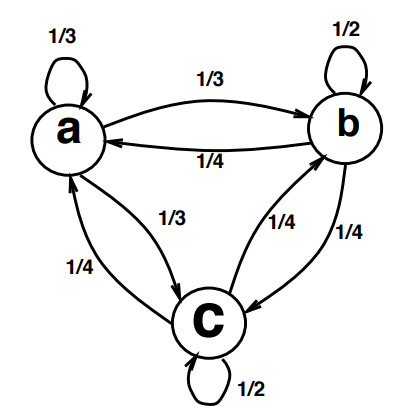

    + **Hidden Markov Models:**

        As opposed to DMMs, for which when we know the observation, we know the state, HMMs even when we know the observation, we cannot tell the state precisely, but rather how likely/probable it is each state, for which we would need an emission distribution. So in addition to the transition probabilities, we would need emission distribution probabilities.

        So for example to estimate the likelihood of the sequence X, given the word sequence $W_{k}$, $P(X | W_{k})$, we would have to compute the sum $\sum_{Q} P(X, Q | W_{k})$, so we will sum up on all possible allowed sequences (paths) (with a given constraint/steps) $Q$ that form the word sequence $W_{k}$. Which corresponds to the computation of the probability $\sum_{Q}P(X | Q, W_{k})\cdot P(Q | W_{k})$ and that second probability to be estimated $P(Q | W_{k})$ is just a probability of a particular path.
        Reminder, $Q$ is a sequence of states that corresponds to a certain sequences of words $W_{k}$. So it corresponds to the computation of this equation $\sum_{Q}P(x_{1}, x_{2, ..., x_{m}} | q_{1}, q_{2}, ..., q_{m}, W_{k})\cdot \prod_{m=1}^{M}P(q_{m} | q_{m-1})$. The first assumption we have to assume here is that this is based on a Markov Model, the second assumption we take is that is conditional independant identically distributed (aka. CIid). It means that $P(x_{m} | q_{m})$ given the state $q_{m}$, feature vector $x_{m}$ is independant of any feature vectors or any other states, so $\sum_{Q}\prod_{m=1}^{M}P(x_{m} | q_{m})\cdot \prod_{m=1}^{M}P(q_{m} | q_{m-1})$. This is emission distribution probability multiplied by the transition probability respectively. This basically means that given the observation feature vector $x_{m}$, I can tell the state probabilistically. The emission distribution can be given by Gaussians, Neural Networks and other ways. We can replace the summation with a max, which is basically approximating (Viterbi approximation) $$\approx \max_{Q\in W_{i}} \prod_{m=1}^{M} P(x_{m} | q_{m})\cdot P(q_{m} | q_{m-1})$$ computing the best possible path.

        - A few simple examples for DMMs & HMMs in the slides. 

## Detection

- These Markov Models are only for analysis, but we would have to look and solve Detection problems even before going there.

- We have an audio signal, and we want to detect the feature observation vector, or rather, whether a certain word is present in the feature observation vector. For this problem, it is called a search, which is basically a two-class classification (exists or not).
- We would need the likelihood of the word given the observation sequence $P(X, W_{k})$, but also the likelihood of 'not the word' given the observation sequence. We generally need to estimate $P(W_{k} | X)$ using the Bayes' rule, we compute $$\frac{P(X | W_{k})\cdot P(W_{k})}{P(X)}$$ we are looking for a particular word, $$\frac{P(X | W_{k})\cdot P(W_{k})}{P(X | W_{k})\cdot P(W_{k}) + P(X | \neg W_{k})\cdot P(\neg W_{k})}$$ which can be developed (or rather simplified) to $$ \frac{1}{1\space + \frac{P(X | \neg W_{k})\cdot P(\neg W_{k})}{P(X | W_{k})\cdot P(W_{k})}}$$ We can easily see through this equation that lower the value of $\frac{P(X | \neg W_{k})}{P(X | W_{k})}$, higher the probability of $P(W_{k} | X)$. But more practically, we would need a threshold to set for this estimate $\frac{P(X | W_{k})}{P(X | \neg W_{k})} \ge \Delta$ in order to consider whether the word in the sequence is truly $W_{k}$ and not any other word or even worse, some noise. Practically speaking, the numerator $P(X | W_{k})$ is completely estimatable, but $P(X | \neg W_{k})$ is the one posing the challenge. One way to estimate it, is to model it using a DMM, with all phones, and it being fully connected, but modelling all the words in existence (or in vocabulary) except the word we are searching for $W_{k}$. We have no idea of ALL the words and sounds and noise that are not the wanted wordd $W_{k}$, we do not know what is everything else. The problem is not the class we are modelling, the word $W_{k}$ but ALL the other words, sounds, noise and everything else that will be considered the other class $\neg W_{k}$. 

- Another variant of this problem, is instead of giving a word $W_{k}$ to search for, give a recording of the keyword directly $X_{keyword}$ and search in the audio signal for this keyword. 

- Another variant of this problem, is giving a feature observation vector or an audio signal, and giving an ID of a speaker, and the model detects whether the speaker is the claimed speaker, or not. $\frac{P(X | ID_{claim})}{P(X | ID_{another\space speaker})} \ge \Delta$.

- Another variant of this is the Speech vs Non-Speech problem. $P(Speech | X) = $ $$\frac{P(X | Speech)\cdot P(Speech)}{P(X | Speech)\cdot P(Speech) + P(X | Non\space Speech)\cdot P(Non\space Speech)}$$ We do not know what is the probability of Non-Speech, we do not know what might be ALL the recordings considered Non-Speech.